In [14]:
# Larger LSTM Network to Generate Text for Alice in Wonderland
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [28]:
epochs = 50
stepsPerEpochs=2
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"

In [3]:

# load ascii text and covert to lowercase
filename = "wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [4]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Characters:  164200
Total Vocab:  64
Total Patterns:  164100


In [5]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the checkpoint

In [16]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [7]:

if os.path.isfile(filepath):
    model.load_weights(filepath)

mc = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, min_delta=0.000001)
callbacks=[es, mc]

In [29]:

# fit the model
history = model.fit(X, y, epochs=epochs, steps_per_epoch=stepsPerEpochs, batch_size=64, callbacks=callbacks)
print(history)

Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 3.1621 - accuracy: 0.2031WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00001: loss did not improve from 2.96974
2/2 [==============================] - 0s 239ms/step - loss: 3.1621 - accuracy: 0.2031
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 3.4238 - accuracy: 0.1172WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00002: loss did not improve from 2.96974
2/2 [==============================] - 1s 252ms/step - loss: 3.4238 - accuracy: 0.1172
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 3.3198 - accuracy: 0.0781WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00003: loss did not improve from 2.96974
2/2 [====================

2/2 [==============================] - ETA: 0s - loss: 3.0617 - accuracy: 0.1797WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00024: loss did not improve from 2.96974
2/2 [==============================] - 0s 244ms/step - loss: 3.0617 - accuracy: 0.1797
Epoch 25/50
2/2 [==============================] - ETA: 0s - loss: 3.0737 - accuracy: 0.2422WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00025: loss did not improve from 2.96974
2/2 [==============================] - 1s 258ms/step - loss: 3.0737 - accuracy: 0.2422
Epoch 26/50
2/2 [==============================] - ETA: 0s - loss: 3.1102 - accuracy: 0.1719WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00026: loss did not improve from 2.96974
2/2 [=============================

Epoch 47/50
2/2 [==============================] - ETA: 0s - loss: 3.1619 - accuracy: 0.1719WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00047: loss did not improve from 2.88708
2/2 [==============================] - 0s 242ms/step - loss: 3.1619 - accuracy: 0.1719
Epoch 48/50
2/2 [==============================] - ETA: 0s - loss: 3.2197 - accuracy: 0.1875WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00048: loss did not improve from 2.88708
2/2 [==============================] - 0s 242ms/step - loss: 3.2197 - accuracy: 0.1875
Epoch 49/50
2/2 [==============================] - ETA: 0s - loss: 3.1627 - accuracy: 0.1250WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy

Epoch 00049: loss did not improve from 2.88708
2/2 [=================

In [32]:
history.history

{'loss': [3.1620821952819824,
  3.423823356628418,
  3.319810152053833,
  3.199821949005127,
  3.03920316696167,
  3.0985474586486816,
  3.1988637447357178,
  3.122063159942627,
  3.1231956481933594,
  3.15781831741333,
  3.034843921661377,
  3.0087034702301025,
  3.229386329650879,
  3.362607955932617,
  3.0941076278686523,
  3.1407265663146973,
  3.1336851119995117,
  3.1487131118774414,
  3.1020243167877197,
  3.148313045501709,
  3.079017162322998,
  3.063426971435547,
  3.093658447265625,
  3.0617313385009766,
  3.07368803024292,
  3.1101794242858887,
  3.1146388053894043,
  2.97485613822937,
  3.344122886657715,
  3.212095260620117,
  3.1804604530334473,
  2.9969024658203125,
  3.1526753902435303,
  3.0721395015716553,
  3.0236401557922363,
  3.0794224739074707,
  3.046492576599121,
  2.8870785236358643,
  3.1677632331848145,
  3.2547755241394043,
  3.1208138465881348,
  3.1860880851745605,
  3.0822560787200928,
  3.243695020675659,
  3.138716697692871,
  3.18751859664917,
  3.16

<module 'matplotlib.pyplot' from 'c:\\users\\t-gamer\\documents\\git\\projetointeligenciaartificialsistemasugestao\\env\\lib\\site-packages\\matplotlib\\pyplot.py'>

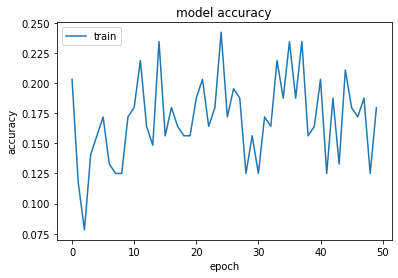

In [30]:
time = datetime.now()
timestampStr = time.strftime("%d %b %Y %H %M %S %f)")
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt

<module 'matplotlib.pyplot' from 'c:\\users\\t-gamer\\documents\\git\\projetointeligenciaartificialsistemasugestao\\env\\lib\\site-packages\\matplotlib\\pyplot.py'>

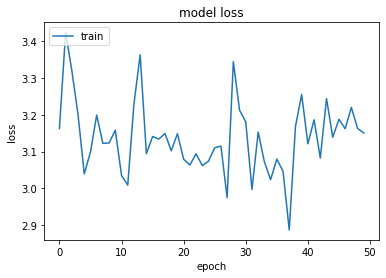

In [31]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss"+timestampStr+".png")
plt

In [33]:
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(50):
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)

    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    #sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

print('**********************************')
print('Predict')
print(''.join(seq_in))
print ("\nDone.")

Seed:
" ded to remain where she was
as long as there was room for her.

“i wish you wouldn’t squeeze so.” sa "
**********************************
Predict
room for her.

“i wish you wouldn’t squeeze so.” sa                                                 

Done.
